In [1]:
%run nb.init.py

C:\Users\m\Desktop\소방안전\nb.init.py:26: SyntaxWarning: invalid escape sequence '\W'
  font_path = "c:\Windows\Fonts\malgun.ttf"


pandas: pd 2.2.3
numpy : np 2.1.0
matplotlib : mpl 3.9.2
seaborn : sns 0.13.2
sklearn : skl 1.5.1


In [2]:
df = pd.read_csv('승강기사고 구조출동 현황 2023.csv', low_memory=False)

In [3]:
df.head()

msfrtn_resc_reprt_no acdnt_cause prcs_result_se_nm  dclr_ymd  dclr_tm  \
0    20231114402R00001         승강기              자체처리  20230101     2800   
1    20231119102R00001         승강기            보호자 인계  20230101    14100   
2    20231117402R00003         승강기            보호자 인계  20230101    50100   
3    20231120105R00002         승강기              자체처리  20230101    60600   
4    20231102000R00003         승강기            기타안전조치  20230101   105500   

   dclr_yr season_se_nm  qtr_se  dclr_mnth  dclr_day  ...  frstt_nm  \
0     2023           겨울       1          1         1  ...     강남소방서   
1     2023           겨울       1          1         1  ...     구로소방서   
2     2023           겨울       1          1         1  ...     강서소방서   
3     2023           겨울       1          1         1  ...     송파소방서   
4     2023           겨울       1          1         1  ...     동작소방서   

        ward_nm lfdau_nm  time_unit_tmprt  time_unit_rainqty  time_unit_ws  \
0           구조대      NaN              0.9                NaN           1.0   
1     수궁119안전센터      NaN              1.5                NaN           2.0   
2           구조대      NaN              0.8                NaN           2.0   
3  종합운동장119안전센터      NaN             -0.2                NaN           3.0   
4         동작소방서      NaN             -0.4                NaN           2.0   

   time_unit_wd  time_unit_humidity  time_unit_msnf  time_unit  
0         200.0                72.0             NaN     1503.0  
1         250.0                71.0             NaN     1104.0  
2         290.0                62.0             NaN     1185.0  
3         320.0                67.0             NaN      962.0  
4         270.0                66.0             NaN      938.0  

[5 rows x 62 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   msfrtn_resc_reprt_no   8388 non-null   object 
 1   acdnt_cause            8388 non-null   object 
 2   prcs_result_se_nm      8388 non-null   object 
 3   dclr_ymd               8388 non-null   int64  
 4   dclr_tm                8388 non-null   int64  
 5   dclr_yr                8388 non-null   int64  
 6   season_se_nm           8388 non-null   object 
 7   qtr_se                 8388 non-null   int64  
 8   dclr_mnth              8388 non-null   int64  
 9   dclr_day               8388 non-null   int64  
 10  dclr_hour              8388 non-null   int64  
 11  dclr_min               8388 non-null   int64  
 12  daywk                  8388 non-null   object 
 13  dsp_ymd                8388 non-null   int64  
 14  dsp_tm                 8388 non-null   int64  
 15  dsp_

In [5]:
df3 = df[df['sigungu_nm'] == '강남구']

In [6]:
print(df3['sigungu_nm'].value_counts())

sigungu_nm
강남구    770
Name: count, dtype: int64


In [7]:
print(df['sigungu_nm'].value_counts())

sigungu_nm
강남구        770
영등포구       518
송파구        508
강서구        489
서초구        438
관악구        436
구로구        431
양천구        401
강동구        395
마포구        369
노원구        365
동대문구       292
성동구        280
중랑구        257
동작구        254
금천구        253
성북구        251
은평구        246
용산구        241
서대문구       222
중구         204
광진구        201
종로구        192
도봉구        190
강북구        175
서울특별시        9
안양시 만안구      1
Name: count, dtype: int64


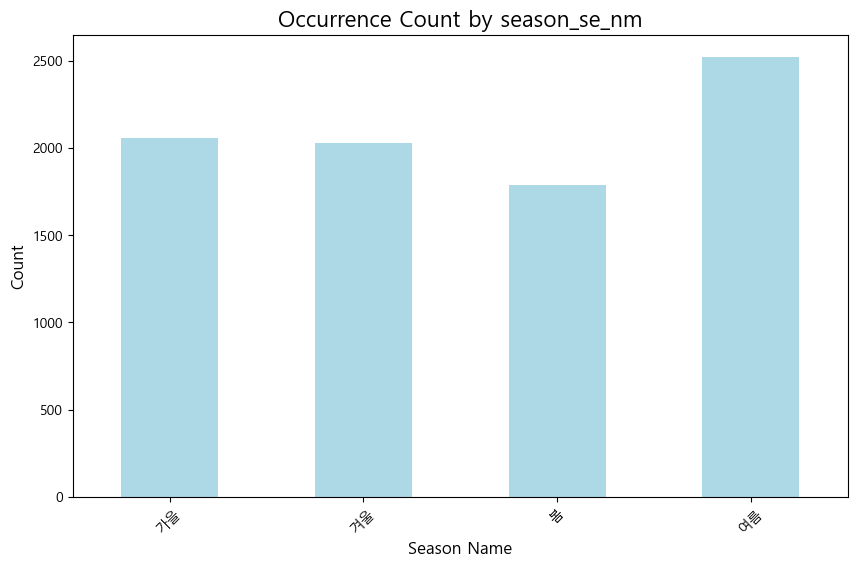

In [8]:
# season_se_nm별로 그룹화한 후 발생 건수 계산
season_counts = df.groupby('season_se_nm').size()

# 시각화
plt.figure(figsize=(10,6))
season_counts.plot(kind='bar', color='lightblue')

plt.title('Occurrence Count by season_se_nm', fontsize=16)
plt.xlabel('Season Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [9]:
season_counts.head()

season_se_nm
가을    2055
겨울    2026
봄     1785
여름    2522
dtype: int64

In [10]:
season_summer = df[df['season_se_nm'] == '여름']

In [11]:
season_summer.head()

msfrtn_resc_reprt_no acdnt_cause prcs_result_se_nm  dclr_ymd  dclr_tm  \
2926    20231114103R00916         승강기              자체처리  20230601    23300   
2927    20231114402R01032         승강기              자체처리  20230601    23300   
2928    20231102201R00240         승강기              자체처리  20230601    53800   
2929    20231116402R00785         승강기              자체처리  20230601    75400   
2930    20231112202R00454         승강기              자체처리  20230601    83800   

      dclr_yr season_se_nm  qtr_se  dclr_mnth  dclr_day  ...  frstt_nm  \
2926     2023           여름       2          6         1  ...     강남소방서   
2927     2023           여름       2          6         1  ...     강남소방서   
2928     2023           여름       2          6         1  ...     동작소방서   
2929     2023           여름       2          6         1  ...     관악소방서   
2930     2023           여름       2          6         1  ...     은평소방서   

        ward_nm lfdau_nm  time_unit_tmprt  time_unit_rainqty  time_unit_ws  \
2926  영동119안전센터      NaN             20.4                NaN           1.0   
2927        구조대      NaN             20.4                NaN           1.0   
2928        구조대      NaN             19.9                NaN           1.0   
2929        구조대      NaN             19.8                NaN           2.0   
2930        구조대      NaN             20.7                NaN           1.0   

      time_unit_wd  time_unit_humidity  time_unit_msnf  time_unit  
2926         270.0                69.0             NaN     2000.0  
2927         270.0                69.0             NaN     2000.0  
2928         290.0                75.0             NaN     2000.0  
2929          20.0                76.0             NaN     2000.0  
2930          50.0                73.0             NaN     2000.0  

[5 rows x 62 columns]

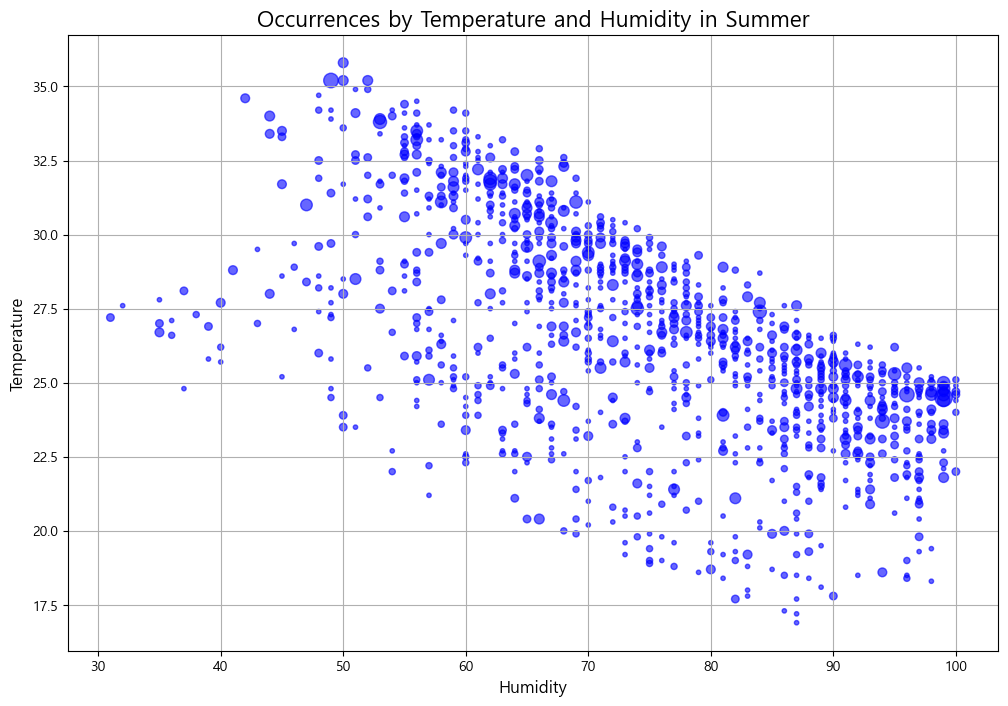

In [12]:

# 1. 온도와 습도별로 그룹화하여 발생 빈도 계산
grouped_data = season_summer.groupby(['time_unit_tmprt', 'time_unit_humidity']).size().reset_index(name='count')

# 2. 산점도 그리기 (온도와 습도에 따른 발생 빈도를 점의 크기로 표현)
plt.figure(figsize=(12, 8))

# 'time_unit_tmprt'는 온도, 'time_unit_humidity'는 습도에 해당하는 열입니다. 실제 데이터에 맞게 사용하세요.
plt.scatter(grouped_data['time_unit_humidity'], grouped_data['time_unit_tmprt'], 
            s=grouped_data['count']*10,  # 발생 빈도에 따라 점의 크기 설정
            alpha=0.6, color='b')

plt.title('Occurrences by Temperature and Humidity in Summer', fontsize=16)
plt.xlabel('Humidity', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.grid(True)

plt.show()


In [13]:
elevator = pd.read_csv('elevator_df.csv', low_memory=False)

In [14]:

# 중복 여부 확인
duplicates = elevator.duplicated()  # 중복된 행을 True로 표시
duplicate_rows = elevator[duplicates]  # 중복된 행만 추출

# 중복된 행 수와 내용 출력
print(f"중복된 행 수: {duplicate_rows.shape[0]}")
print("중복된 행 내용:")
print(duplicate_rows)


중복된 행 수: 0
중복된 행 내용:
Empty DataFrame
Columns: [Unnamed: 0, address1, address2, applcBeDt, applcEnDt, buldNm, elevatorNo, elvtrAsignNo, elvtrDetailForm, elvtrDiv, elvtrForm, elvtrKindNm, elvtrSttsNm, frstInstallationDe, inspctInsttNm, installationDe, installationPlace, liveLoad, mnfcturcpnynm, ratedCap, ratedSpeed, shuttleFloorCnt, sido, sigungu]
Index: []

[0 rows x 24 columns]


In [15]:
elevator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10000 non-null  int64 
 1   address1            10000 non-null  object
 2   address2            10000 non-null  object
 3   applcBeDt           10000 non-null  object
 4   applcEnDt           10000 non-null  object
 5   buldNm              10000 non-null  object
 6   elevatorNo          10000 non-null  object
 7   elvtrAsignNo        10000 non-null  object
 8   elvtrDetailForm     10000 non-null  object
 9   elvtrDiv            10000 non-null  object
 10  elvtrForm           10000 non-null  object
 11  elvtrKindNm         10000 non-null  object
 12  elvtrSttsNm         10000 non-null  object
 13  frstInstallationDe  10000 non-null  object
 14  inspctInsttNm       10000 non-null  object
 15  installationDe      10000 non-null  object
 16  installationPlace   100

In [16]:
print(elevator['elvtrKindNm'].unique())

['승객용' '19911215' '소방구조용' '소방구조/장애인용' '자동차용' '장애인용' '장애/전망용' '덤웨이터' '전망용'
 '19890216' '19930601' '화물용' '승객화물용' '병원용' '19880601' '19930413'
 '19830601' '소방구조/장애/승객화물' '장애/병원용' '장애/승객화물용' '소방구조/장애/전망용' '20011220'
 '소방구조/승객화물용' '19940612' '19991222' '20030627' '20011128' '소방구조/장애/병원용'
 '20020823' '19840601' '19990915' '20011105' '20011103' '운행중지(검사연기)'
 '19990930' '장애/전망/병원용' '20030319' '소방구조/병원용' '19910601' '주택엘리베이터'
 '20220525' '20020612' '19900901' '19920715' '19910412' '19910520'
 '19920601' '19900601' '19950112' '19970127' '운행중' '수직형휠체어리프트' '19980209'
 '19921208' '19930604' '19861027' '19920510' '20041007']


In [17]:
# 검사유효기간을 알 수 없는 행 데이터 제거
elevator_clean = elevator.dropna()
elevator_clean.to_csv('elevator_clean.csv', encoding='utf-8-sig')

In [18]:
elevator_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9287 entries, 0 to 9997
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          9287 non-null   int64 
 1   address1            9287 non-null   object
 2   address2            9287 non-null   object
 3   applcBeDt           9287 non-null   object
 4   applcEnDt           9287 non-null   object
 5   buldNm              9287 non-null   object
 6   elevatorNo          9287 non-null   object
 7   elvtrAsignNo        9287 non-null   object
 8   elvtrDetailForm     9287 non-null   object
 9   elvtrDiv            9287 non-null   object
 10  elvtrForm           9287 non-null   object
 11  elvtrKindNm         9287 non-null   object
 12  elvtrSttsNm         9287 non-null   object
 13  frstInstallationDe  9287 non-null   object
 14  inspctInsttNm       9287 non-null   object
 15  installationDe      9287 non-null   object
 16  installationPlace   9287 non-

In [19]:
elevator_clean

Unnamed: 0               address1 address2 applcBeDt applcEnDt  \
0              0   서울특별시 강남구 압구정로30길 23    (신사동)  20240313  20250312   
1              1   서울특별시 강남구 논현로175길 64    (신사동)  20240729  20250128   
2              2      서울특별시 강남구 삼성로 212    (대치동)  20240308  20240907   
3              3      서울특별시 강남구 삼성로 212    (대치동)  20240307  20240906   
4              4      서울특별시 강남구 삼성로 212    (대치동)  20240307  20240906   
...          ...                    ...      ...       ...       ...   
9959        9959    서울특별시 강남구 학동로53길 22    (논현동)  20240722  20250721   
9972        9972   서울특별시 강남구 논현로161길 18    (신사동)  20240718  20250117   
9987        9987   서울특별시 강남구 도산대로55길 22    (청담동)  20240620  20250619   
9989        9989   서울특별시 강남구 영동대로50길 10    (대치동)  20231023  20241022   
9997        9997  서울특별시 강남구 강남대로116길 22    (논현동)  20240126  20250125   

           buldNm elevatorNo elvtrAsignNo elvtrDetailForm elvtrDiv  ...  \
0            미승빌딩    0099093            1            VVVF    엘리베이터  ...   
1            유표빌딩    0071534            1            VVVF    엘리베이터  ...   
2           은마APT    0036067           40            VVVF    엘리베이터  ...   
3           은마APT    0036064           37            VVVF    엘리베이터  ...   
4           은마APT    0036063           36            VVVF    엘리베이터  ...   
...           ...        ...          ...             ...      ...  ...   
9959         SA빌딩    0076677            1            VVVF    엘리베이터  ...   
9972         양영빌딩    0011052            1              교류    엘리베이터  ...   
9987         금정빌딩    0035856            1              교류    엘리베이터  ...   
9989         동원빌딩    0045666            1              교류    엘리베이터  ...   
9997  (주)피앤지코퍼레이션    0099274            1              교류    엘리베이터  ...   

     inspctInsttNm installationDe installationPlace liveLoad    mnfcturcpnynm  \
0           서울강남지사       20000929               1-1     1000       현대엘리베이터(주)   
1           서울강남지사       19911219               1-1      550   (주)대명엘리베이터(울산)   
2           서울강남지사       19791009              30-2      900     엘지산전(주) 창원공장   
3           서울강남지사       19791009              28-2      900     엘지산전(주) 창원공장   
4           서울강남지사       19791009              28-1      900          (주)삼일엘텍   
...            ...            ...               ...      ...              ...   
9959        서울강남지사       20150604               1-1      550       동양엘리베이터(주)   
9972        서울강남지사       19960315               1-1      320       (주)세진엘리베이터   
9987        서울강남지사       20030326               1-1      450  오티스엘리베이터(유)창원공장   
9989        서울강남지사       20001219               1-1     2000          (주)선산기계   
9997        서울강남지사       20041011               1-1      300   태화종합엘리베이터 - 폐업   

     ratedCap ratedSpeed shuttleFloorCnt sido sigungu  
0          15        1.5               9   서울     강남구  
1           7          1               5   서울     강남구  
2          13          1              14   서울     강남구  
3          13          1              14   서울     강남구  
4          13          1              14   서울     강남구  
...       ...        ...             ...  ...     ...  
9959        8          1               6   서울     강남구  
9972        4       0.38               3   서울     강남구  
9987        6        0.5               4   서울     강남구  
9989        0       0.33               2   서울     강남구  
9997        4        0.5               4   서울     강남구  

[9287 rows x 24 columns]

In [20]:
elevator_clean.head()

Unnamed: 0              address1 address2 applcBeDt applcEnDt buldNm  \
0           0  서울특별시 강남구 압구정로30길 23    (신사동)  20240313  20250312   미승빌딩   
1           1  서울특별시 강남구 논현로175길 64    (신사동)  20240729  20250128   유표빌딩   
2           2     서울특별시 강남구 삼성로 212    (대치동)  20240308  20240907  은마APT   
3           3     서울특별시 강남구 삼성로 212    (대치동)  20240307  20240906  은마APT   
4           4     서울특별시 강남구 삼성로 212    (대치동)  20240307  20240906  은마APT   

  elevatorNo elvtrAsignNo elvtrDetailForm elvtrDiv  ... inspctInsttNm  \
0    0099093            1            VVVF    엘리베이터  ...        서울강남지사   
1    0071534            1            VVVF    엘리베이터  ...        서울강남지사   
2    0036067           40            VVVF    엘리베이터  ...        서울강남지사   
3    0036064           37            VVVF    엘리베이터  ...        서울강남지사   
4    0036063           36            VVVF    엘리베이터  ...        서울강남지사   

  installationDe installationPlace liveLoad   mnfcturcpnynm ratedCap  \
0       20000929               1-1     1000      현대엘리베이터(주)       15   
1       19911219               1-1      550  (주)대명엘리베이터(울산)        7   
2       19791009              30-2      900    엘지산전(주) 창원공장       13   
3       19791009              28-2      900    엘지산전(주) 창원공장       13   
4       19791009              28-1      900         (주)삼일엘텍       13   

  ratedSpeed shuttleFloorCnt sido sigungu  
0        1.5               9   서울     강남구  
1          1               5   서울     강남구  
2          1              14   서울     강남구  
3          1              14   서울     강남구  
4          1              14   서울     강남구  

[5 rows x 24 columns]

In [21]:
# 필요없는 열 삭제

elevator_clean_drop = elevator_clean.drop(['sido','sigungu','elvtrAsignNo','elvtrDetailForm','elvtrDiv','elvtrForm','inspctInsttNm','installationPlace','liveLoad','mnfcturcpnynm'],axis=1)

In [22]:
elevator_clean_drop.head()

Unnamed: 0              address1 address2 applcBeDt applcEnDt buldNm  \
0           0  서울특별시 강남구 압구정로30길 23    (신사동)  20240313  20250312   미승빌딩   
1           1  서울특별시 강남구 논현로175길 64    (신사동)  20240729  20250128   유표빌딩   
2           2     서울특별시 강남구 삼성로 212    (대치동)  20240308  20240907  은마APT   
3           3     서울특별시 강남구 삼성로 212    (대치동)  20240307  20240906  은마APT   
4           4     서울특별시 강남구 삼성로 212    (대치동)  20240307  20240906  은마APT   

  elevatorNo elvtrKindNm elvtrSttsNm frstInstallationDe installationDe  \
0    0099093         승객용         운행중           19920601       20000929   
1    0071534         승객용         운행중           19911219       19911219   
2    0036067         승객용         운행중           19791009       19791009   
3    0036064         승객용         운행중           19791009       19791009   
4    0036063         승객용         운행중           19791009       19791009   

  ratedCap ratedSpeed shuttleFloorCnt  
0       15        1.5               9  
1        7          1               5  
2       13          1              14  
3       13          1              14  
4       13          1              14

In [23]:
# 컬럼명 변경
elevator_clean_drop.rename(
    columns={
        'address1': '건물주소1',
        'address2': '건물주소2',
        'applcBeDt': '검사유효기간(시작일자)',
        'applcEnDt': '검사유효기간(종료일자)',
        'buldNm': '건물명',
        'elevatorNo': '승강기고유번호',  # elevatorNo로 수정
        'elvtrSttsNm': '승강기상태',
        'frstInstallationDe': '최초설치일자',
        'installationDe': '설치일자',
        'ratedCap': '최대정원',
        'ratedSpeed': '정격속도',
        'shuttleFloorCnt': '운행층수'
    },
    inplace=True  # 원본 DataFrame에서 직접 변경
)


In [24]:
elevator_clean_drop.rename(columns={'elvtrKindNm' : '승강기종류'}, inplace=True)

In [25]:
elevator_clean_drop.head()

Unnamed: 0                 건물주소1  건물주소2 검사유효기간(시작일자) 검사유효기간(종료일자)    건물명  \
0           0  서울특별시 강남구 압구정로30길 23  (신사동)     20240313     20250312   미승빌딩   
1           1  서울특별시 강남구 논현로175길 64  (신사동)     20240729     20250128   유표빌딩   
2           2     서울특별시 강남구 삼성로 212  (대치동)     20240308     20240907  은마APT   
3           3     서울특별시 강남구 삼성로 212  (대치동)     20240307     20240906  은마APT   
4           4     서울특별시 강남구 삼성로 212  (대치동)     20240307     20240906  은마APT   

   승강기고유번호 승강기종류 승강기상태    최초설치일자      설치일자 최대정원 정격속도 운행층수  
0  0099093   승객용   운행중  19920601  20000929   15  1.5    9  
1  0071534   승객용   운행중  19911219  19911219    7    1    5  
2  0036067   승객용   운행중  19791009  19791009   13    1   14  
3  0036064   승객용   운행중  19791009  19791009   13    1   14  
4  0036063   승객용   운행중  19791009  19791009   13    1   14

In [26]:
elevator_clean_drop = elevator_clean_drop.drop('Unnamed: 0', axis=1)

In [27]:
elevator_clean_drop.head()

건물주소1  건물주소2 검사유효기간(시작일자) 검사유효기간(종료일자)    건물명  승강기고유번호  \
0  서울특별시 강남구 압구정로30길 23  (신사동)     20240313     20250312   미승빌딩  0099093   
1  서울특별시 강남구 논현로175길 64  (신사동)     20240729     20250128   유표빌딩  0071534   
2     서울특별시 강남구 삼성로 212  (대치동)     20240308     20240907  은마APT  0036067   
3     서울특별시 강남구 삼성로 212  (대치동)     20240307     20240906  은마APT  0036064   
4     서울특별시 강남구 삼성로 212  (대치동)     20240307     20240906  은마APT  0036063   

  승강기종류 승강기상태    최초설치일자      설치일자 최대정원 정격속도 운행층수  
0   승객용   운행중  19920601  20000929   15  1.5    9  
1   승객용   운행중  19911219  19911219    7    1    5  
2   승객용   운행중  19791009  19791009   13    1   14  
3   승객용   운행중  19791009  19791009   13    1   14  
4   승객용   운행중  19791009  19791009   13    1   14

In [28]:
elevator_clean_drop.describe()

건물주소1  건물주소2 검사유효기간(시작일자) 검사유효기간(종료일자)       건물명  \
count                   9287   9287         9287         9287      9287   
unique                  5050     54          597          599      4210   
top     서울특별시 강남구 압구정로29길 71  (역삼동)     20240528     20241127  압구정현대APT   
freq                      88   2050          133          113        88   

        승강기고유번호 승강기종류 승강기상태    최초설치일자      설치일자  최대정원  정격속도  운행층수  
count      9287  9287  9287      9287      9287  9287  9287  9287  
unique     9287    19     2      2912      3747    36    27    54  
top     0099274   승객용   운행중  19910601  19910601    15     1     5  
freq          1  5996  9213       291        76  1745  5293  1215

In [29]:
elevator_clean_drop['승강기종류'].value_counts()

승강기종류
승객용             5996
장애인용            1645
소방구조/장애인용        617
소방구조용            371
전망용              165
소방구조/장애/승객화물     111
자동차용             109
장애/전망용            74
장애/승객화물용          66
승객화물용             57
병원용               33
장애/병원용            18
화물용               10
소방구조/승객화물용         9
소방구조/병원용           2
소방구조/장애/전망용        1
소방구조/장애/병원용        1
장애/전망/병원용          1
주택엘리베이터            1
Name: count, dtype: int64

In [30]:
elevator_clean_drop['승강기상태'].value_counts()

승강기상태
운행중           9213
운행중지(검사연기)      74
Name: count, dtype: int64

In [31]:
elevator_clean_drop.describe()

건물주소1  건물주소2 검사유효기간(시작일자) 검사유효기간(종료일자)       건물명  \
count                   9287   9287         9287         9287      9287   
unique                  5050     54          597          599      4210   
top     서울특별시 강남구 압구정로29길 71  (역삼동)     20240528     20241127  압구정현대APT   
freq                      88   2050          133          113        88   

        승강기고유번호 승강기종류 승강기상태    최초설치일자      설치일자  최대정원  정격속도  운행층수  
count      9287  9287  9287      9287      9287  9287  9287  9287  
unique     9287    19     2      2912      3747    36    27    54  
top     0099274   승객용   운행중  19910601  19910601    15     1     5  
freq          1  5996  9213       291        76  1745  5293  1215

In [32]:
elevator_clean_drop['승강기종류'].value_counts()

승강기종류
승객용             5996
장애인용            1645
소방구조/장애인용        617
소방구조용            371
전망용              165
소방구조/장애/승객화물     111
자동차용             109
장애/전망용            74
장애/승객화물용          66
승객화물용             57
병원용               33
장애/병원용            18
화물용               10
소방구조/승객화물용         9
소방구조/병원용           2
소방구조/장애/전망용        1
소방구조/장애/병원용        1
장애/전망/병원용          1
주택엘리베이터            1
Name: count, dtype: int64

In [33]:
elevator_clean_drop.to_csv('elvt.csv',encoding='utf-8-sig')